## Deep Neural Network in Keras  2

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/suniltt/fdp2021/blob/main/deep_neural_network/deep_net_in_keras_2.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout # new!
from tensorflow.keras.layers import BatchNormalization


from tensorflow.keras.optimizers import SGD  
 

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

#### Preprocess data

In [3]:

X_train = X_train.reshape(60000, 784).astype('float32')   
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [4]:
X_train /= 255
X_valid /= 255

In [5]:
n_classes = 10
y_train =keras.utils.np_utils.to_categorical (y_train, n_classes)
y_valid= keras.utils.np_utils.to_categorical(y_valid, n_classes)
 

#### Design neural network architecture

In [6]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

### __[ What is Batch Normalization](batch_normalization.ipynb)__

### __[ Regularization and Dropout](regularization.ipynb)__

#### Configure model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train!

In [9]:
history=model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3676 - accuracy: 0.8907 - val_loss: 0.1589 - val_accuracy: 0.9537
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1540 - accuracy: 0.9535 - val_loss: 0.1150 - val_accuracy: 0.9653
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1140 - accuracy: 0.9651 - val_loss: 0.1101 - val_accuracy: 0.9663
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0918 - accuracy: 0.9722 - val_loss: 0.0891 - val_accuracy: 0.9727
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0904 - val_accuracy: 0.9717
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0698 - accuracy: 0.9784 - val_loss: 0.0929 - val_accuracy: 0.9739
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0895 - val_accuracy: 0.9740
Epoch 

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


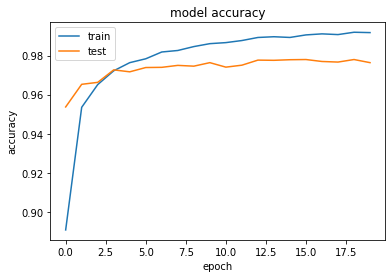

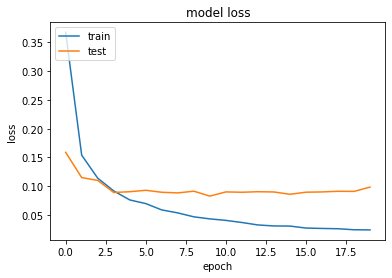

In [11]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()